In [1]:
library(tidyverse)
library(dslabs)
library(gridExtra)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  3.0.1     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'dslabs' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [2]:
data(heights)

In [3]:
heights %>% head

sex,height
<fct>,<dbl>
Male,75
Male,70
Male,68
Male,74
Male,61
Female,65


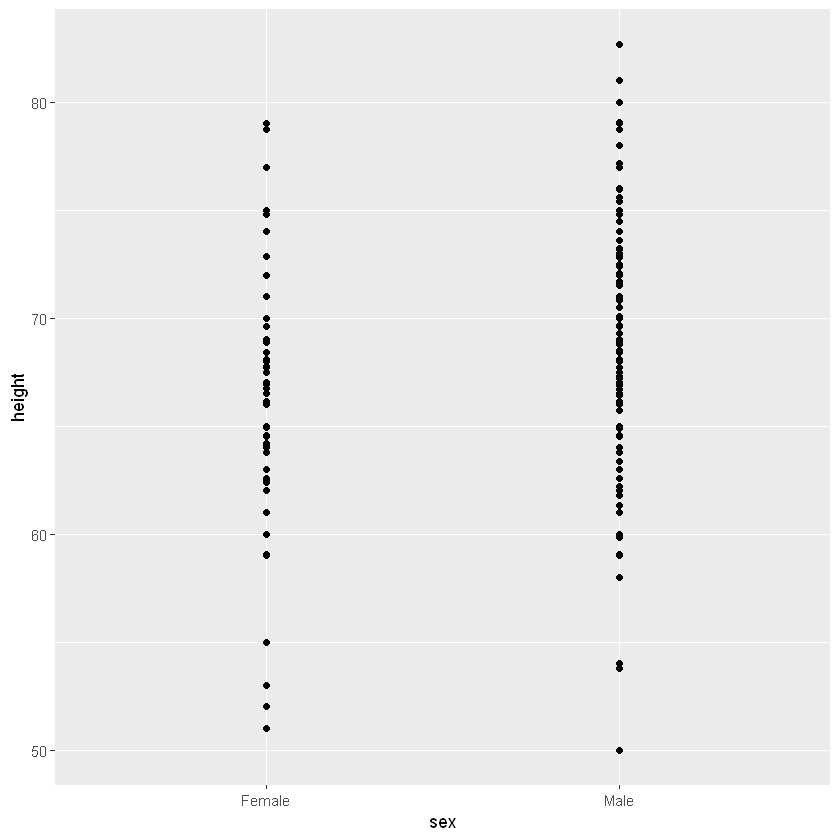

In [4]:
# this chart can be imprved by adding jitters and alpha
heights %>% 
  ggplot(aes(sex, height)) + 
  geom_point() 

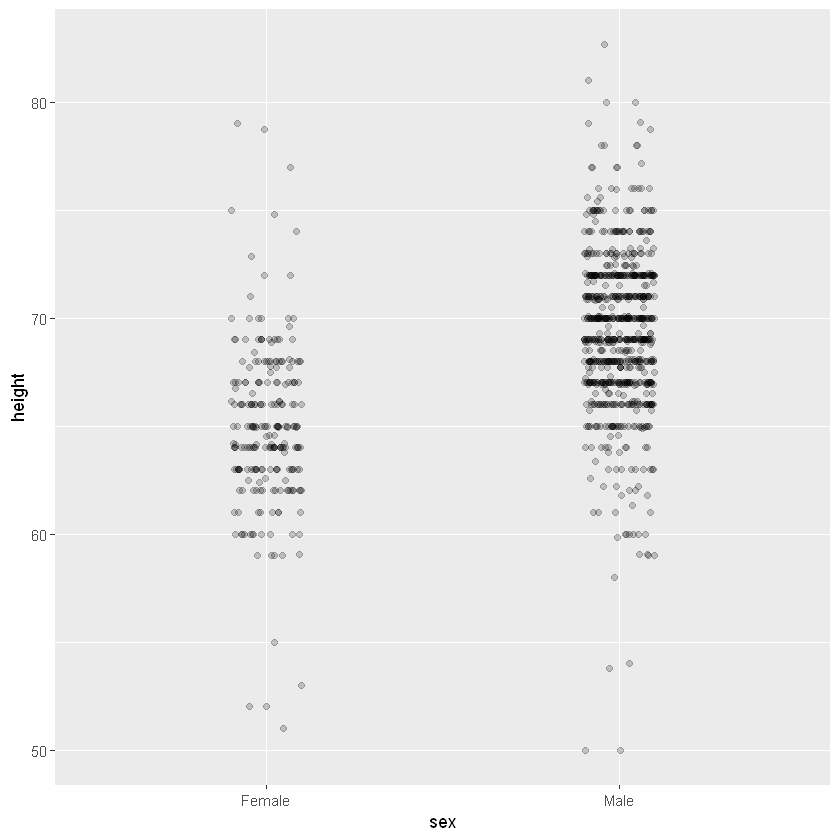

In [5]:
heights %>% 
  ggplot(aes(sex, height)) +
  geom_jitter(width = 0.1, alpha = 0.2) 

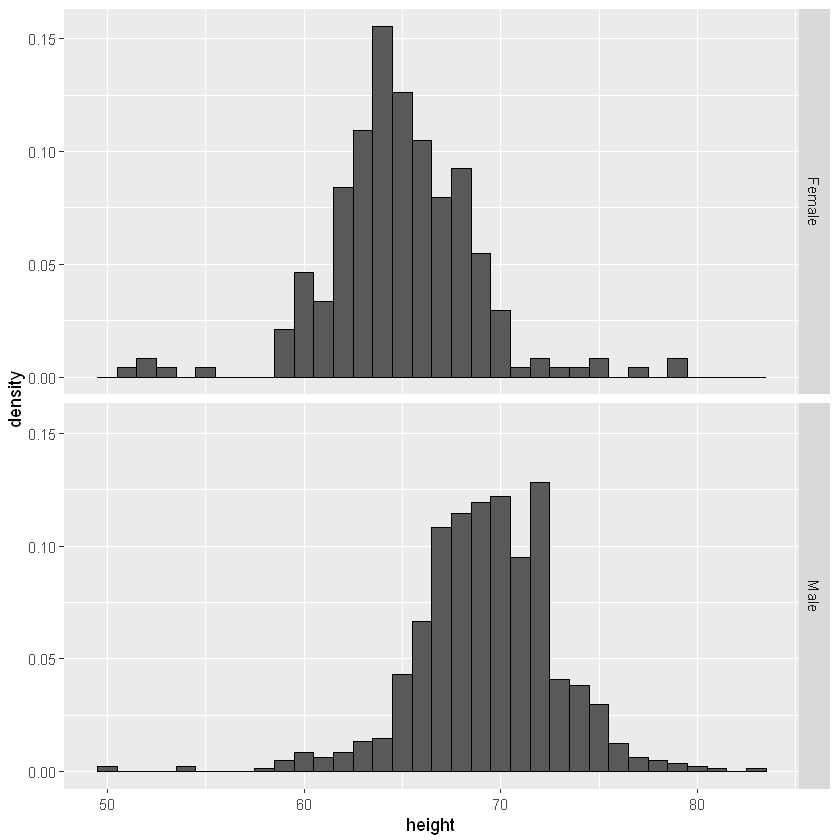

In [7]:
#  Align plots vertically to see horizontal changes and horizontally to see vertical changes
# horizontal change
heights %>% 
  ggplot(aes(height, ..density..)) +
  geom_histogram(binwidth = 1, color="black") +
  facet_grid(sex~.)

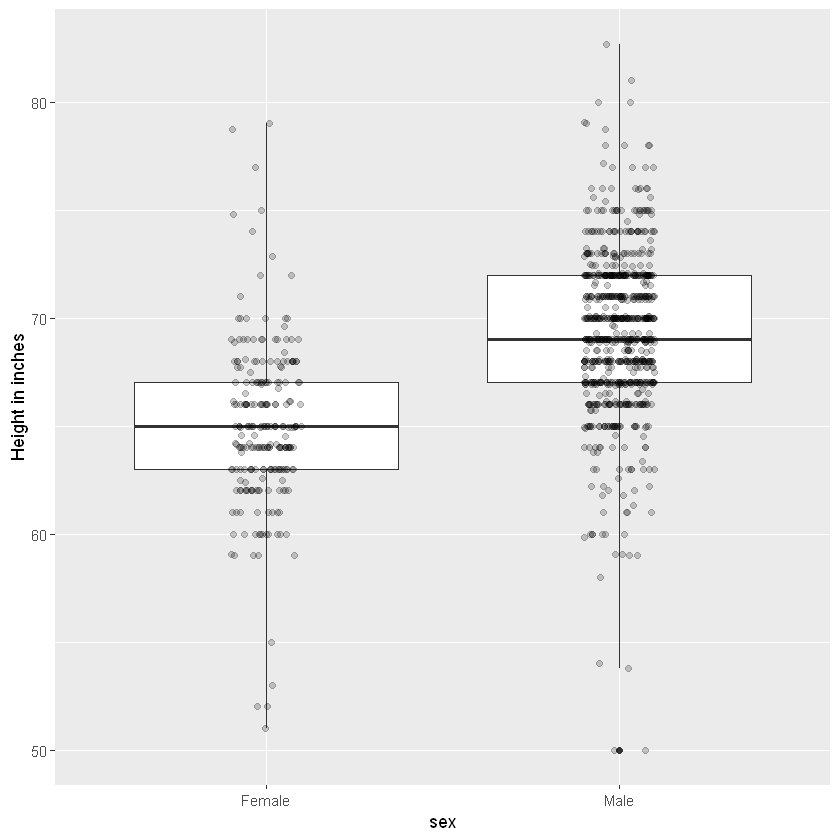

In [8]:
# more better
 heights %>% 
  ggplot(aes(sex, height)) + 
  geom_boxplot(coef=3) + 
  geom_jitter(width = 0.1, alpha = 0.2) +
  ylab("Height in inches")

In [9]:
# log transformation
#lets draw population chart
data(gapminder)

In [10]:
gapminder %>% head

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


In [ ]:
gapminder %>% filter(year == 2010) %>% 
    mutate(population

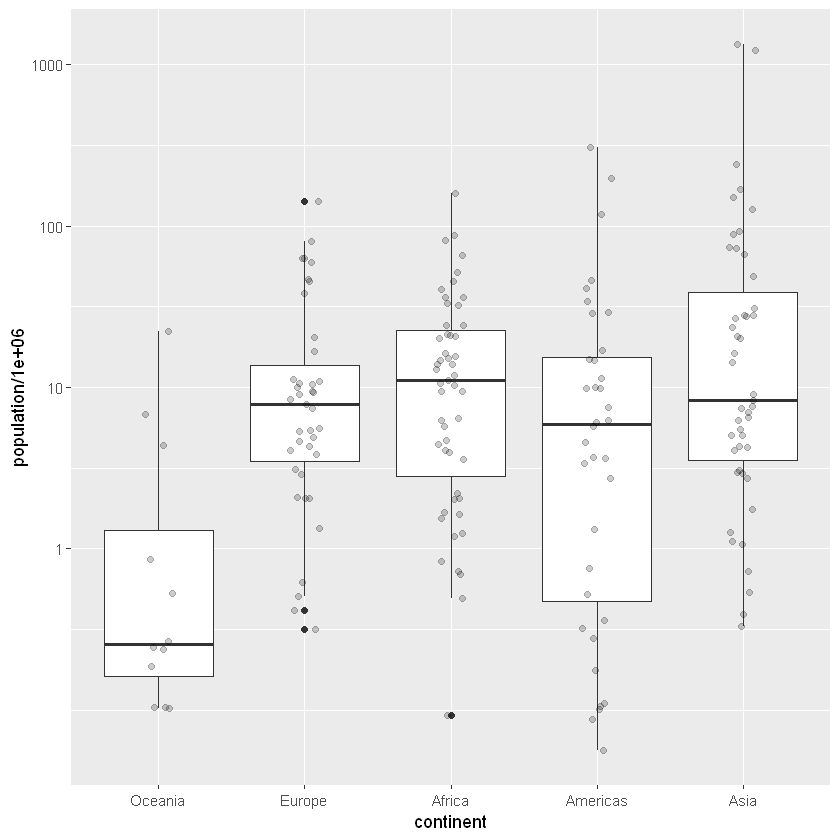

In [81]:
#population should be shown in log10
gapminder %>% filter(year == 2010) %>% 
    mutate(continent=reorder(continent, population, mean)) %>% 
    ggplot(aes(continent, population/1000000)) +
    geom_boxplot()+
    geom_jitter(width = 0.1, alpha = 0.2)+
    scale_y_continuous(breaks=c(0, 1, 10, 100, 1000, 10000), trans = "log10")

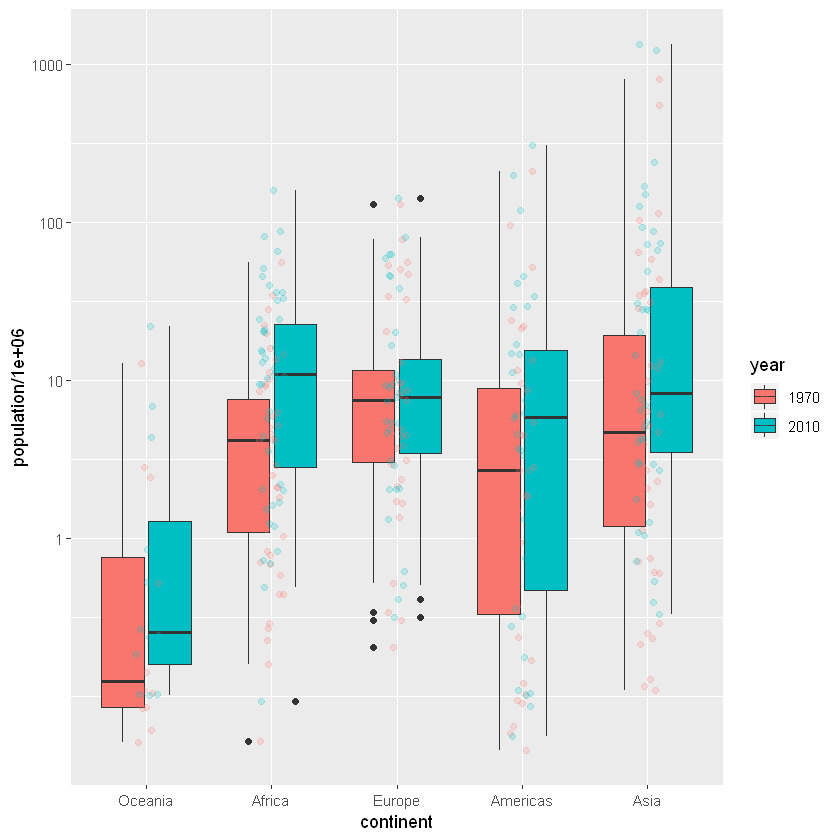

In [96]:
gapminder %>% filter(year %in% c(1970, 2010)) %>% 
    mutate(continent=reorder(continent, population, mean), year = factor(year)) %>% 
    ggplot(aes(continent, population/1000000)) +
    geom_boxplot(aes(fill=year))+
    geom_jitter(width = 0.1, alpha = 0.2, aes(color = year))+
#     geom_point() + 
    scale_y_continuous(breaks=c(0, 1, 10, 100, 1000, 10000), trans = "log10")

In [97]:
# think of colorblind people


use this for reference <http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette>

## Plots for two variables

In [99]:
# In general, you should use scatterplots to visualize the relationship between two variables.

`In every single instance in which we have examined the relationship between two variables, including total murders versus population size, life expectancy versus fertility rates, and infant mortality versus income, we have used scatterplots`

In [102]:
# exception for above, slope chart and Bland-Altman chart


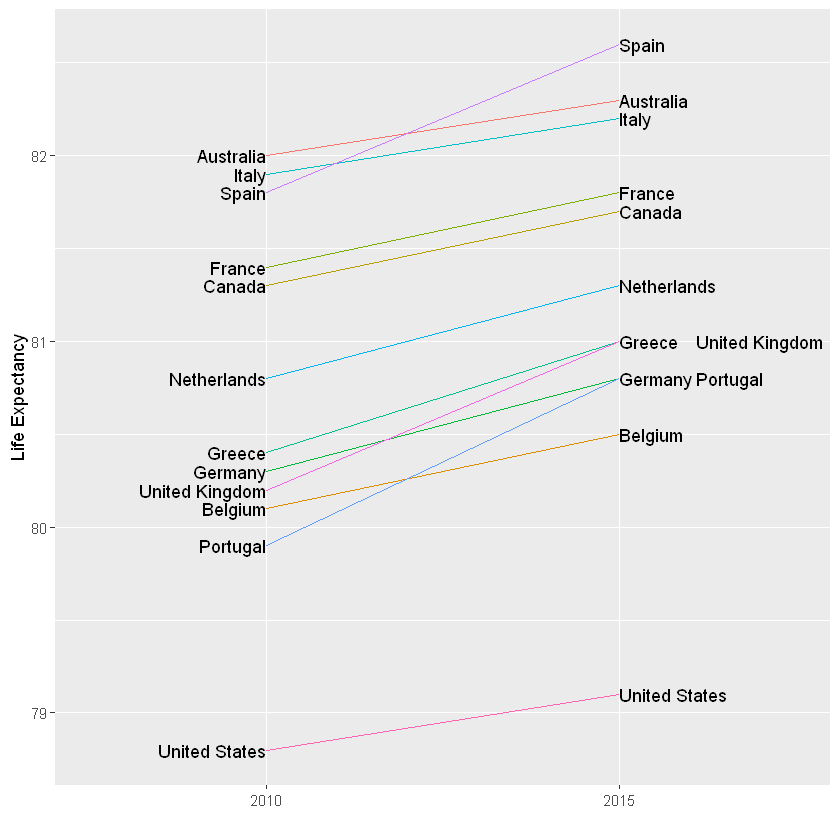

In [103]:
# slope chart
west <- c("Western Europe","Northern Europe","Southern Europe",
          "Northern America","Australia and New Zealand")

dat <- gapminder %>% 
  filter(year%in% c(2010, 2015) & region %in% west & 
           !is.na(life_expectancy) & population > 10^7) 

dat %>%
  mutate(location = ifelse(year == 2010, 1, 2), 
         location = ifelse(year == 2015 & 
                             country %in% c("United Kingdom", "Portugal"),
                           location+0.22, location),
         hjust = ifelse(year == 2010, 1, 0)) %>%
  mutate(year = as.factor(year)) %>%
  ggplot(aes(year, life_expectancy, group = country)) +
  geom_line(aes(color = country), show.legend = FALSE) +
  geom_text(aes(x = location, label = country, hjust = hjust), 
            show.legend = FALSE) +
  xlab("") + ylab("Life Expectancy")

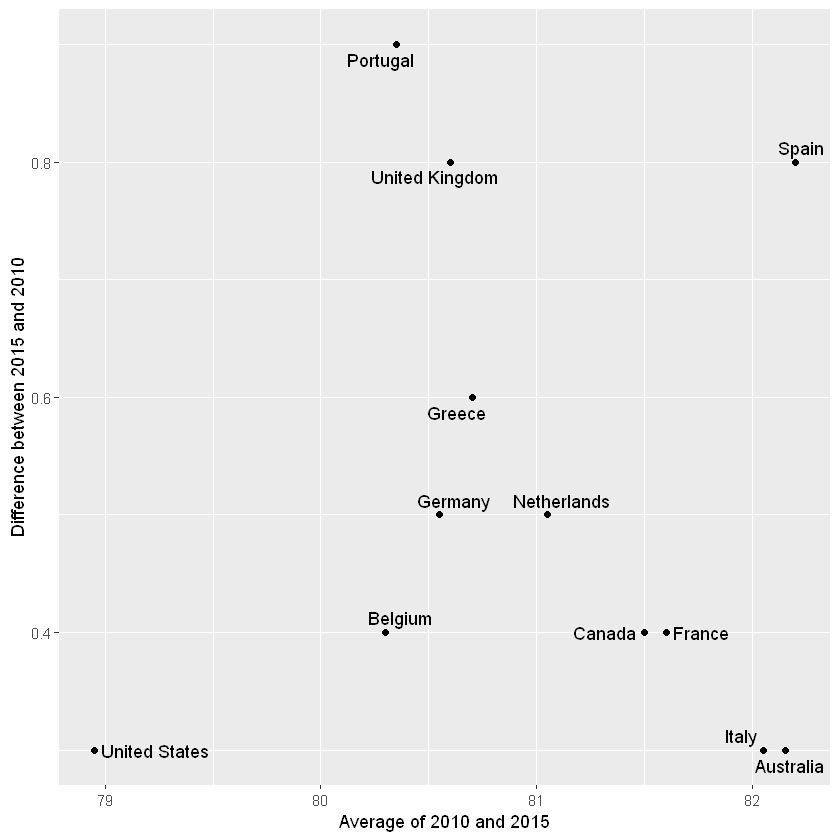

In [110]:
#bland-altman plot
# Bland-Altman plot, also known as the Tukey mean-difference plot and the MA-plot, shows the difference versus the average
library(ggrepel)
dat %>% 
  mutate(year = paste0("life_expectancy_", year)) %>%
  select(country, year, life_expectancy) %>% 
  spread(year, life_expectancy) %>% 
  mutate(average = (life_expectancy_2015 + life_expectancy_2010)/2,
         difference = life_expectancy_2015 - life_expectancy_2010) %>%
  ggplot(aes(average, difference, label = country)) + 
  geom_point() +
  geom_text_repel() +
  geom_abline(lty = 2) +
  xlab("Average of 2010 and 2015") + 
  ylab("Difference between 2015 and 2010")

#  Encoding a third variable

In [111]:
# encode categorical variables with color and shape. These shapes can be controlled with shape argument

In [112]:
# For continuous variables, we can use color, intensity, or size

`When selecting colors to quantify a numeric variable, we choose between two options: sequential and diverging. Sequential colors are suited for data that goes from high to low. High values are clearly distinguished from low values. Here are some examples offered by the package RColorBrewer`

`Diverging colors are used to represent values that diverge from a center. We put equal emphasis on both ends of the data range: higher than the center and lower than the center. An example of when we would use a divergent pattern would be if we were to show height in standard deviations away from the average. Here are some examples of divergent patterns:`

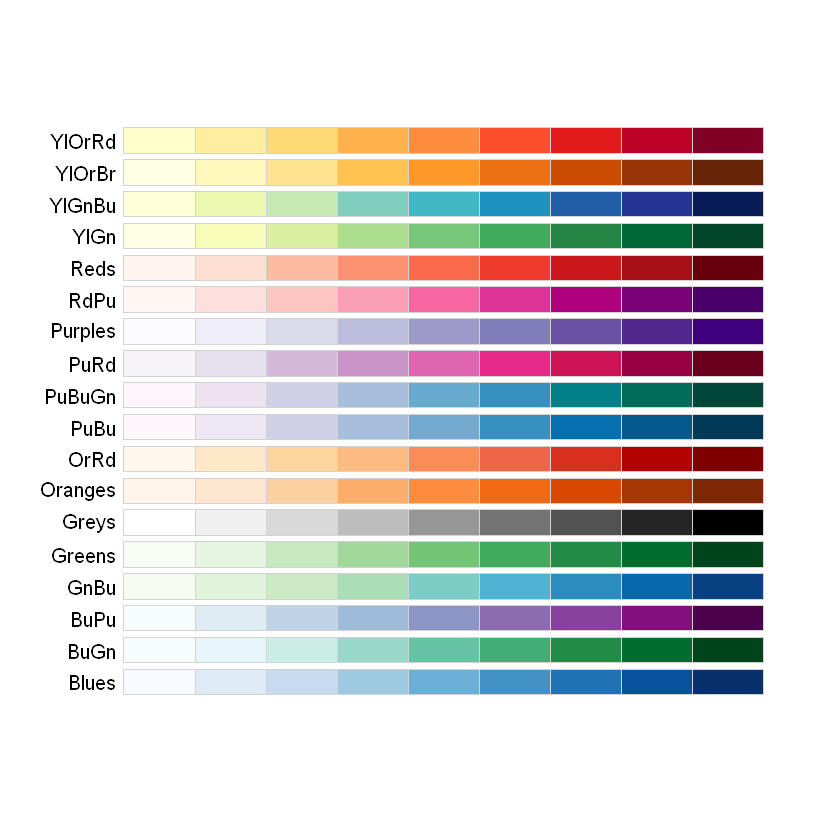

In [113]:
library(RColorBrewer)
display.brewer.all(type="seq")

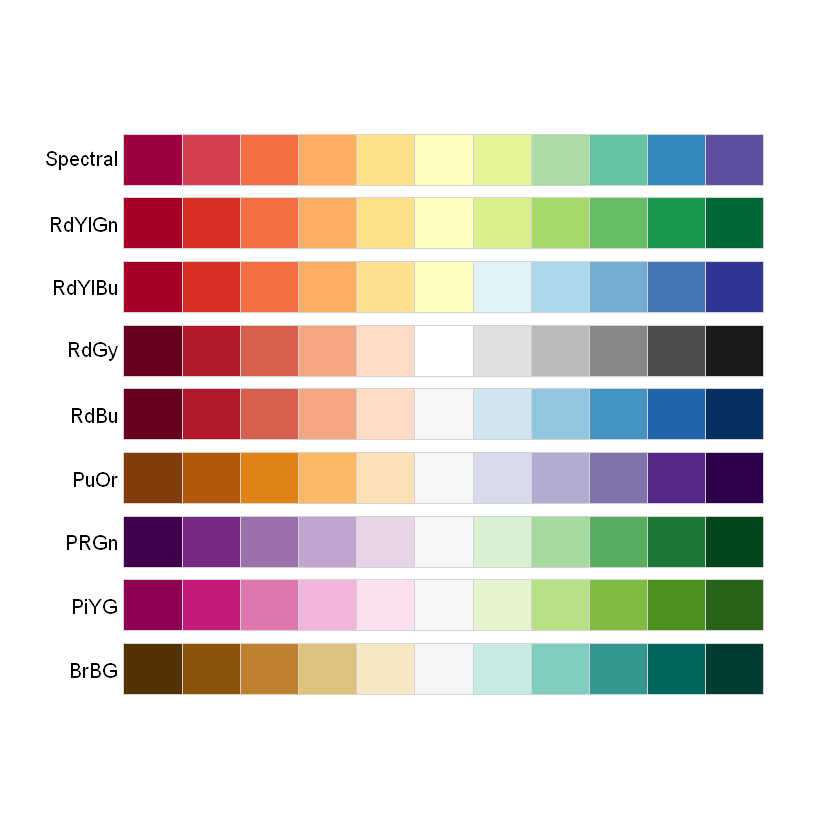

In [114]:
library(RColorBrewer)
display.brewer.all(type="div")

In [115]:
# Avoid pseudo-three-dimensional plots

###  Know your audience
`Graphs can be used for 1) our own exploratory data analysis, 2) to convey a message to experts, or 3) to help tell a story to a general audience. Make sure that the intended audience understands each element of the plot.`

### Case study: vaccines and infectious diseases

In [116]:
library(tidyverse)
library(RColorBrewer)
library(dslabs)
data(us_contagious_diseases)
names(us_contagious_diseases)

[1] "disease"         "state"           "year"            "weeks_reporting"
[5] "count"           "population"

In [117]:
us_contagious_diseases %>% head

disease,state,year,weeks_reporting,count,population
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Hepatitis A,Alabama,1966,50,321,3345787
Hepatitis A,Alabama,1967,49,291,3364130
Hepatitis A,Alabama,1968,52,314,3386068
Hepatitis A,Alabama,1969,49,380,3412450
Hepatitis A,Alabama,1970,51,413,3444165
Hepatitis A,Alabama,1971,51,378,3481798


In [123]:
the_disease <- "Measles"
dat <- us_contagious_diseases %>%
  filter(!state%in%c("Hawaii","Alaska") & disease == the_disease) %>%
  mutate(rate = count / population * 10000 * 52 / weeks_reporting) %>% 
  mutate(state = reorder(state, rate)) 
# Note that there is a weeks_reporting column that tells us for how many weeks of the year data was reported. 
# We have to adjust for that value when computing the rate.

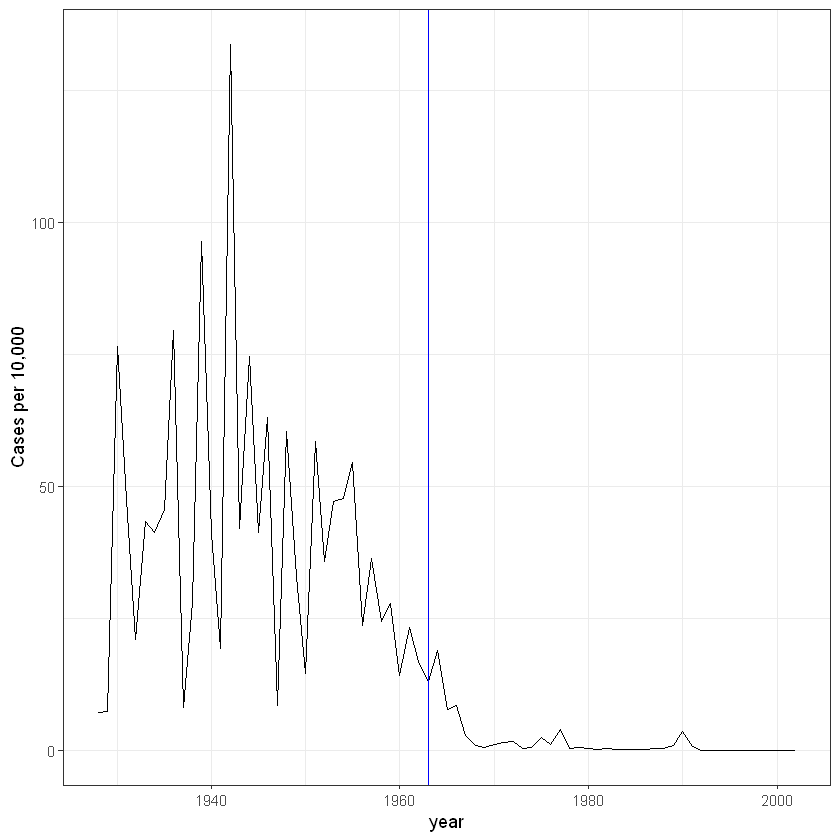

In [122]:
dat %>% filter(state == "California" & !is.na(rate)) %>%
  ggplot(aes(year, rate)) +
  geom_line() + 
  ylab("Cases per 10,000")  + 
  geom_vline(xintercept=1963, col = "blue")+
  theme_bw()
# We added a vertical line at 1963 since this is when the vaccine was introduced 

In [124]:
# Now can we show data for all states in one plot? We have three variables to show: year, state, and rate

`In the WSJ figure, they use the x-axis for year, the y-axis for state, and color hue to represent rates`
<http://graphics.wsj.com/infectious-diseases-and-vaccines/>

In [129]:
# In our example, we want to use a sequential palette since there is no meaningful center, just low and high rates.
# We use the geometry geom_tile to tile the region with colors representing disease rates
# We use a square root transformation to avoid having the really high counts dominate the plot.
#  Notice that missing values are shown in grey

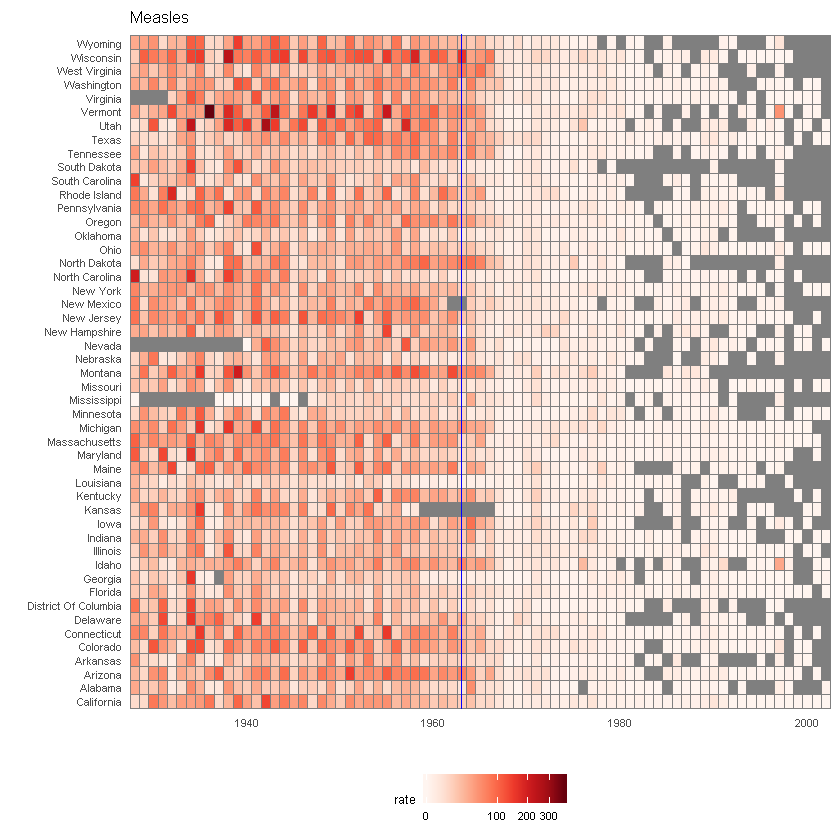

In [128]:
dat %>% ggplot(aes(year, state, fill = rate)) +
  geom_tile(color = "grey50") +
  scale_x_continuous(expand=c(0,0)) +
  scale_fill_gradientn(colors = brewer.pal(9, "Reds"), trans = "sqrt") +
  geom_vline(xintercept=1963, col = "blue") +
  theme_minimal() +  
  theme(panel.grid = element_blank(), 
        legend.position="bottom", 
        text = element_text(size = 8)) +
  ggtitle(the_disease) + 
  ylab("") + xlab("")

In [130]:
?scale_x_continuous

In [133]:
# shwoing value little bit more helpful
#Position and lengths are better cues. If we are willing to lose state information, 
# we can make a version of the plot that shows the values with position
avg <- us_contagious_diseases %>%
  filter(disease==the_disease) %>% group_by(year) %>%
  summarize(us_rate = sum(count, na.rm = TRUE) / 
              sum(population, na.rm = TRUE) * 10000)
#> `summarise()` ungrouping output (override with `.groups` argument)

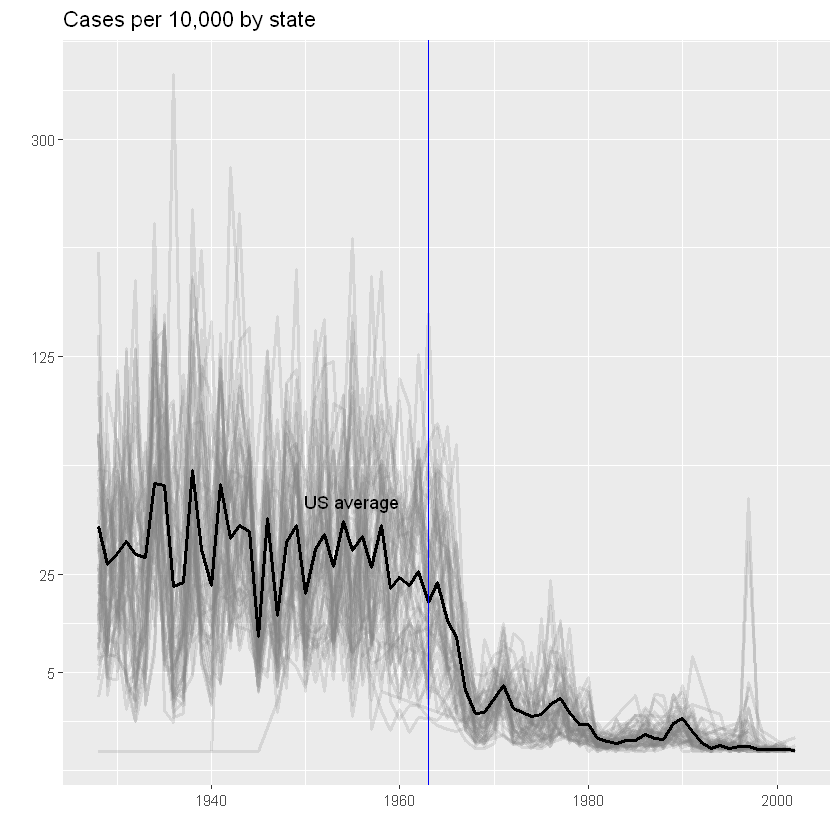

In [132]:
dat %>% 
  filter(!is.na(rate)) %>%
    ggplot() +
  geom_line(aes(year, rate, group = state),  color = "grey50", 
            show.legend = FALSE, alpha = 0.2, size = 1) +
  geom_line(mapping = aes(year, us_rate),  data = avg, size = 1) +
  scale_y_continuous(trans = "sqrt", breaks = c(5, 25, 125, 300)) + 
  ggtitle("Cases per 10,000 by state") + 
  xlab("") + ylab("") +
  geom_text(data = data.frame(x = 1955, y = 50), 
            mapping = aes(x, y, label="US average"), 
            color="black") + 
  geom_vline(xintercept=1963, col = "blue")